In [120]:
# Connect to s3 with the boto3 sdk
from boto.s3.connection import S3Connection
from PIL import Image 
import webbrowser
import datetime
from boto.s3.key import Key

# Use yaml for printing in human readable format
import yaml

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw

%matplotlib inline

import boto3

s3 = boto3.resource('s3')
BUCKET='rekognitionbotoartifact'


In [133]:
s3bucket = s3.Bucket(BUCKET)

size = 0
count = 0
for obj in s3bucket.objects.all():
    size += obj.size
    count += 1
 
print ("%.3f GB" % (size*1.0/1024/1024/1024))
print ("num files: "+str(count))

# Print all the images info in the bucket
for obj in s3bucket.objects.all():
        print ("{name}\t{size}\t{modified}".format(
                name = obj.key,
                size = obj.size,
                modified = obj.last_modified,
                ))

0.002 GB
num files: 21
Cano1.png	12302	2017-05-30 17:38:41+00:00
beachpic.png	92369	2017-06-21 14:30:49+00:00
canoandcruz.png	102642	2017-05-30 17:38:41+00:00
canoandjayz.png	50004	2017-05-30 17:38:41+00:00
canoandreyes.png	81886	2017-05-30 17:38:42+00:00
cat_picture.png	113078	2017-06-19 20:30:25+00:00
cruz.png	18921	2017-05-30 17:38:42+00:00
dog_pic.png	56996	2017-06-19 20:30:27+00:00
embiidandokafor.png	94450	2017-05-30 17:38:42+00:00
embiidandsimmons.png	161768	2017-05-30 17:38:43+00:00
foursixers.png	77603	2017-05-30 17:38:44+00:00
hinkie.png	163536	2017-05-30 17:38:44+00:00
hinkieandbrown.png	48090	2017-05-30 17:38:45+00:00
hinkieandnoel.png	316380	2017-05-30 17:38:45+00:00
hinkieandsaric.png	228041	2017-05-30 17:38:46+00:00
hinkiembiid.png	101365	2017-05-30 17:38:47+00:00
hinkieofakor.png	245820	2017-05-30 17:38:47+00:00
running_on_beach.png	60107	2017-06-21 14:06:01+00:00
saricandsilver.png	166729	2017-05-30 17:38:48+00:00
simmonsandsilver.png	161652	2017-05-30 17:38:48+00:00
t

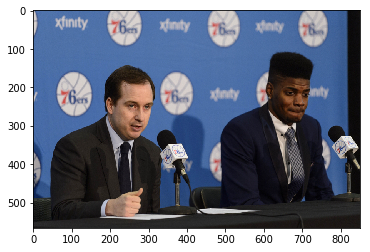

In [122]:
# Retrieve and print a selected image, save it in the current folder
image='hinkieandnoel.png'.replace('+',' ')
folder='./'
temp_image = folder +'temp_image.png'

# Use the same file name for each temp image or you will start getting a ton of photos 
# stored in the folder
s3bucket.download_file(image, temp_image)

pil_im = Image.open(temp_image, 'r')
plt.imshow(np.asarray(pil_im))

The number of faces detected in the picture
2
Pprinting face bounding boxes below
Height: 0.25363171100616455
Left: 0.23222222924232483
Top: 0.33539459109306335
Width: 0.16777777671813965


face number 0
0.23222222924232483
0.33539459109306335
0.16777777671813965
0.25363171100616455

face number 1
0.7344444394111633
0.30035334825515747
0.13777777552604675
0.20691008865833282
width 850
height 566


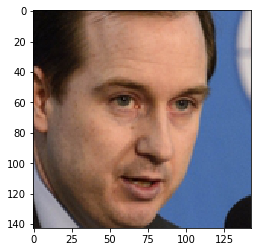

In [123]:
# Detect faces in the first picture in the s3bucket
import json
from pprint import pprint
import boto3

image='hinkieandnoel.png'.replace('+',' ')

# Use the detect faces API to detect the faces in the image
client = boto3.client('rekognition',region_name='us-east-1')
response = client.detect_faces(
    Image={
        'S3Object': {
            'Bucket': BUCKET,
            'Name': image
            #,'Version': '1'
        }
    }
)

# The api returns a json dictionary of length 3
# print('data type and length of the response from the detect_faces call')
# print(type(response))
# print(len(response))

#parsing out that dictionary
#print (response['ResponseMetadata'])
#print()
#print (response['FaceDetails'])
#print()
#print (response['OrientationCorrection'])


# Print how many faces are in this picture
print('The number of faces detected in the picture')
faceCount=len(response['FaceDetails'])
print(faceCount)

if(faceCount>0):
    # Next step is to show only the cropped faces
    # The IndexFaces api call will automatically take care of this parsing 
    # for you when sending pictures with multiple faces to a FaceCollection.
    print('Pprinting face bounding boxes below')
    counter=0
    
    # Which of the faces from the photo do you want to print? rekognition makes the
    # largest face equal to index zero
    faceNumToKeep=0
    
    # These toKeep____ variables are to give flexibility 
    # on which face to crop and print
    toKeepLeft=0.0
    toKeepTop=0.0
    toKeepWidth=0.0
    toKeepHeight=0.0

    # If you care to see the raw data that we parse in the for loop below
    boundingBox=response['FaceDetails'][0]['BoundingBox']
    
    # Use yaml for printing in human readable format
    print(yaml.dump(boundingBox, allow_unicode=True, default_flow_style=False))

    # Loop over each face and print the bounding boxes, save the one
    # specified by the faceNumToKeep param
    
    for x in response['FaceDetails']:
        print('\nface number '+str(counter))
        boundingBox=x['BoundingBox']
        #print(boundingBox)
        print(boundingBox['Left'])
        print(boundingBox['Top'])
        print(boundingBox['Width'])
        print(boundingBox['Height'])
        
        if (counter==faceNumToKeep):
            toKeepLeft=boundingBox['Left']
            toKeepTop=boundingBox['Top']
            toKeepWidth=boundingBox['Width']
            toKeepHeight=boundingBox['Height']
        counter=counter+1
    
    # Retrieve the whole photo from s3, crop the face of interest and print
    key = s3.Object(BUCKET,image)
    
    # Use the same file name for each temp image or you will start getting a ton of photos 
    # stored in the folder
    s3bucket.download_file(image, temp_image)
                                                                     
    pil_im = Image.open(temp_image, 'r') 
    picwidth=pil_im.size[0]
    picheight=pil_im.size[1]
    
    print('width '+str(picwidth))
    print('height '+str(picheight))
    
    plt.imshow(np.asarray(pil_im.crop((
        picwidth*toKeepLeft,
        picheight*toKeepTop,
        picwidth*toKeepLeft+picwidth*toKeepWidth,
        picheight*toKeepTop+picheight*toKeepHeight
                             ))))

In [6]:
# Detect labels
import boto3

client = boto3.client('rekognition',region_name='us-east-1')
print('Image: %s\n' % image)
response = client.detect_labels(
    Image={
        'S3Object': {
            'Bucket': 'rekognitionbotoartifact',
            'Name': image
            #,'Version': '1'
        }
    }
)

print(yaml.dump(response, allow_unicode=True, default_flow_style=False))

# Next step is to store these labels in elastic search or S3 for processing in something
# Like a graph database

Image: hinkieandnoel.png

Labels:
- Confidence: 99.32720947265625
  Name: Press Conference
- Confidence: 99.32720947265625
  Name: Speech
- Confidence: 99.20915222167969
  Name: People
- Confidence: 99.20916748046875
  Name: Person
- Confidence: 99.19699096679688
  Name: Human
OrientationCorrection: ROTATE_0
ResponseMetadata:
  HTTPHeaders:
    connection: keep-alive
    content-length: '301'
    content-type: application/x-amz-json-1.1
    date: Mon, 24 Jul 2017 10:16:44 GMT
    x-amzn-requestid: 30d73646-7059-11e7-b36e-8ff0865a2d66
  HTTPStatusCode: 200
  RequestId: 30d73646-7059-11e7-b36e-8ff0865a2d66
  RetryAttempts: 0



FaceMatches:
- Face:
    BoundingBox:
      Height: 0.22499999403953552
      Left: 0.5228365659713745
      Top: 0.08269231021404266
      Width: 0.14182692766189575
    Confidence: 99.99974822998047
    Landmarks:
    - Type: eyeLeft
      X: 0.5669853091239929
      Y: 0.1866709291934967
    - Type: eyeRight
      X: 0.6058629155158997
      Y: 0.17201091349124908
    - Type: nose
      X: 0.5795437693595886
      Y: 0.22794507443904877
    - Type: mouthLeft
      X: 0.5803983807563782
      Y: 0.2628828287124634
    - Type: mouthRight
      X: 0.6100651025772095
      Y: 0.2531978487968445
    Pose:
      Pitch: -1.1224039793014526
      Roll: -11.783175468444824
      Yaw: -24.130502700805664
    Quality:
      Brightness: 44.783504486083984
      Sharpness: 99.9305191040039
  Similarity: 95.0
ResponseMetadata:
  HTTPHeaders:
    connection: keep-alive
    content-length: '2974'
    content-type: application/x-amz-json-1.1
    date: Mon, 24 Jul 2017 14:09:59 GMT
    x-amzn-request

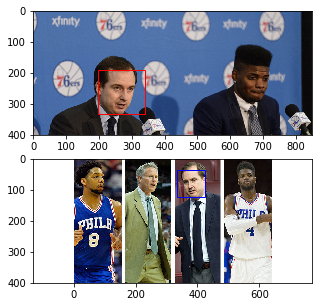

In [124]:
# Compare faces
import boto3
import matplotlib.patches as patches


source_image = 'hinkieandnoel.png'.replace('+',' ')
target_image = 'foursixers.png'.replace('+',' ')

folder='./'
temp_image1 = folder +'temp_image1.png'
temp_image2 = folder +'temp_image2.png'
s3bucket.download_file(source_image, temp_image1)
s3bucket.download_file(target_image, temp_image2)

client = boto3.client('rekognition',region_name='us-east-1')
response = client.compare_faces(
    SourceImage={
        'S3Object': {
            'Bucket': BUCKET,
            'Name': source_image
            #,'Version': '1'
        }
    },
    TargetImage={
        'S3Object': {
            'Bucket': BUCKET,
            'Name': target_image
            #,'Version': '1'
        }
    },
    SimilarityThreshold=50.0
)

print(yaml.dump(response, allow_unicode=True, default_flow_style=False))

# Plot the two images
fig,ax = subplots(2,1,figsize=(5, 5), sharey=True)

pil_im1 = Image.open(temp_image1, 'r')
pil_im2 = Image.open(temp_image2, 'r')

pw1=pil_im1.size[0]
ph1=pil_im1.size[1]

pw2=pil_im2.size[0]
ph2=pil_im2.size[1]

src_face = response['SourceImageFace']['BoundingBox']
rect = patches.Rectangle((pw1 * src_face['Left'],
                          ph1 * src_face['Top']),
                         pw1 * src_face['Width'],
                         ph1 * src_face['Height'],
                         linewidth=1,edgecolor='r',facecolor='none')

ax[0].add_patch(rect)
ax[0].imshow(np.asarray(pil_im1),aspect='equal')
ax[0].axis('tight')


for x in response['FaceMatches']:
    # print(yaml.dump(x['Face']['BoundingBox'], allow_unicode=True, default_flow_style=False))
    trg_face = x['Face']['BoundingBox']
    
    rect = patches.Rectangle((pw2 * trg_face['Left'],
                          ph2 * trg_face['Top']),
                         pw2 * trg_face['Width'],
                         ph2 * trg_face['Height'],
                         linewidth=1,edgecolor='b',facecolor='none')
    ax[1].add_patch(rect)


ax[1].imshow(np.asarray(pil_im2),aspect='equal')



In [125]:
from botocore.exceptions import ClientError

# This section gives examples of one-time calls to the face collection and search apis. 
# the next group will send the entire bucket to a collection

# Create FaceCollection
try:
    response = client.create_collection(
        CollectionId='rekognitioncollection'
    )
except ClientError as e:
    print(e)

print('Bucket name: %s' % s3bucket.name)

# Rekognition does not allow '/' in ExternalImageId strings
print('External ID to use: %s' % (s3bucket.name + ':' + image))


# An example of sending an individual photo to the collection
response = client.index_faces(
    CollectionId='rekognitioncollection',
    Image={
        'S3Object': {
            'Bucket': BUCKET,
            'Name': image
            #,'Version': '1'
        }
    },
    ExternalImageId=(s3bucket.name+':'+image).replace('/',':').replace(' ','-'),
    DetectionAttributes=['DEFAULT']
)

#number of faces in the photo just indexed
faceCount=len(response['FaceRecords'])
print('Number of faces in the photo just indexed: %s' % (faceCount))


# print('The response from indexing this last photo:')
# print (yaml.dump(response, allow_unicode=True, default_flow_style=False))

#list collections tells us what collections we have made so far
print("\nThe list of face collections")
print(str(client.list_collections()['CollectionIds']))

#this next line tells us how many faces are in the specified collectionId
print('\nsize of the collection (FaceCollections do not duplicate identical images)')
print(len(client.list_faces(CollectionId='rekognitioncollection')['Faces']))


if(faceCount>0):
    #the list_faces api call gives metadata about what faces are currently in the collection
    print('first output from the list_faces[Faces] api call')
    print(client.list_faces(CollectionId='rekognitioncollection')['Faces'][0])
    print()

    
#delete the collection 
client.delete_collection(CollectionId='rekognitioncollection')
print("\nthe list of face collections viewable to our account")
print(str(client.list_collections()['CollectionIds']))

An error occurred (ResourceAlreadyExistsException) when calling the CreateCollection operation: The collection id: rekognitioncollection already exists
Bucket name: rekognitionbotoartifact
External ID to use: rekognitionbotoartifact:hinkieandnoel.png
Number of faces in the photo just indexed: 2

The list of face collections
['rekognitioncollection']

size of the collection (FaceCollections do not duplicate identical images)
44
first output from the list_faces[Faces] api call
{'ExternalImageId': 'rekognitionbotoartifact:beachpic.png', 'FaceId': '0187fd28-e1c5-5e12-9a63-6d6b4655ab3e', 'ImageId': 'ef211e6f-0d78-54c0-9f14-11265d8fa8a5', 'Confidence': 99.97949981689453, 'BoundingBox': {'Height': 0.078888900578022, 'Width': 0.078888900578022, 'Top': 0.1333329975605011, 'Left': 0.15666699409484863}}


the list of face collections viewable to our account
[]


In [126]:
from botocore.exceptions import ClientError

# Send all images in the bucket to the face collection 
# The output here is identical to the identify_faces command, so index_faces is often a better choice
# Write this output to a S3 bucket marked by the timestamp of ending the iteration over all objects in the bucket
# client.delete_collection(CollectionId='rekognitioncollection')

try:
    response = client.create_collection(
        CollectionId='rekognitioncollection'
    )
except ClientError as e:
    print(e)
    
count=0
failcount=0
print ('start time is '+str(datetime.datetime.now()))
#api output that will be written to s3
towrite=''

for obj in s3bucket.objects.all():
    size += obj.size
    print(obj.key)
    #print(str((s3bucket.name+':'+key.name).replace('/',':').replace(' ','-').strip()))
    count += 1
    
    if (count%100==0):
        print('count is '+str(count))
        print ('time is '+str(datetime.datetime.now()))
    try:
        response = client.index_faces(
            CollectionId='rekognitioncollection',
            Image={
            'S3Object': {
                'Bucket': 'rekognitionbotoartifact',
                'Name': obj.key
                #,'Version': '1'
            }
            },
            ExternalImageId=str((s3bucket.name+':'+obj.key).replace('/',':').replace(' ','-').strip())
            #careful here with string replacements. District of Columbia may trip us up.
            #DetectionAttributes=['DEFAULT']
        )
        towrite=towrite+'\n'+str(response)
    except Error as e:
        # print(e)
        print ('failed on: '+obj.key)
        failcount=(failcount+1)
print('successcount was '+str(count))
print('failcount was '+str(failcount))
print ('end time is '+str(datetime.datetime.now()))
#do matching faces come out when indexing or only when searching??


start time is 2017-07-24 14:10:15.696454
Cano1.png
beachpic.png
canoandcruz.png
canoandjayz.png
canoandreyes.png
cat_picture.png
cruz.png
dog_pic.png
embiidandokafor.png
embiidandsimmons.png
foursixers.png
hinkie.png
hinkieandbrown.png
hinkieandnoel.png
hinkieandsaric.png
hinkiembiid.png
hinkieofakor.png
running_on_beach.png
saricandsilver.png
simmonsandsilver.png
threesixers.png
successcount was 21
failcount was 0
end time is 2017-07-24 14:10:44.586335


In [127]:
# Write api output to s3. object's name is defined by api name and timestamp
s3 = boto3.resource('s3')
BUCKET='rekognitionoutput-2381'
try:
    s3.create_bucket(Bucket=BUCKET) 
except:
    pass

obj_name='index_faces/'+str(datetime.datetime.now())+'.txt'
towrite='This is a test of S3\nThis is the second line'

object = s3.Object(BUCKET, obj_name)
object.put(Body=towrite)

# Test to make sure that this content correctly made it to the bucket
outputbucket = s3.Bucket(BUCKET)
print(obj_name)

filesuffix=obj_name[obj_name.rfind('/')+1:]
print (filesuffix)

outputbucket.download_file(obj_name, folder+filesuffix)

N=2
with open('./'+filesuffix) as myfile:
    head = [next(myfile) for x in range(N)]
    print (head)
    
myfile.close()

index_faces/2017-07-24 14:10:45.183771.txt
2017-07-24 14:10:45.183771.txt
['This is a test of S3\n', 'This is the second line']



size of the collection (FaceCollections do not duplicate identical images)
44
simmonsandsilver.png


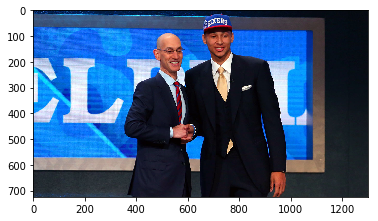

In [128]:
# This code block is here in case users want to print one of the recently indexed photos

# This next line tells us how many faces are in the specified collectionId
# With the full marinuscmu collection of 52,573 photos: # faces are sent to the collection
print('\nsize of the collection (FaceCollections do not duplicate identical images)')
print(len(client.list_faces(CollectionId='rekognitioncollection')['Faces']))

# Retrieve and print a selected image
image='simmonsandsilver.png'.replace('+',' ')
imagesuffix=image[image.rfind('/')+1:]
print(imagesuffix)

# Use the same file name for each temp image or you will start getting a ton of photos 
# stored in the folder

s3bucket.download_file(image, temp_image)
pil_im = Image.open(temp_image, 'r')
plt.imshow(np.asarray(pil_im))

4
100.0 rekognitionbotoartifact/embiidandsimmons.png
99.17 rekognitionbotoartifact/threesixers.png
94.78 rekognitionbotoartifact/embiidandokafor.png
85.87 rekognitionbotoartifact/hinkiembiid.png


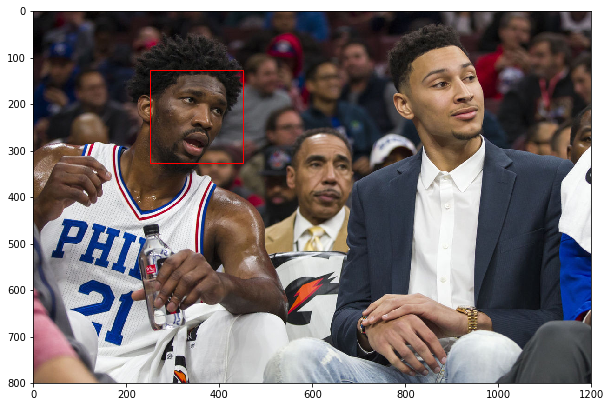

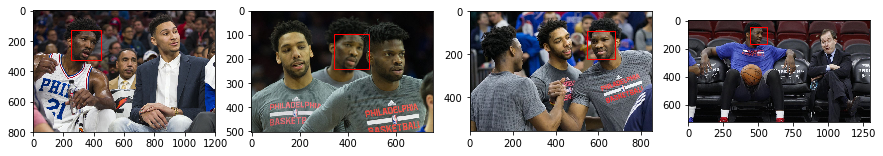

In [132]:
# Step2) pick a new picture and search all faces in the collection for a similar face
# In examples with multiple faces, Rekognition's default is to use the largest face detected
image='embiidandsimmons.png'.replace('+',' ').replace('-',' ')
    
#print all photos that match the face_id
response=client.search_faces_by_image(
    CollectionId='rekognitioncollection',
    Image={
        'S3Object': {
            'Bucket': 'rekognitionbotoartifact',
            'Name': image
            #,'Version': '1'
        }
    },
    #FaceMatchThreshold=25,
    MaxFaces=10
)
# print(response['FaceMatches'])
# print (yaml.dump(response, allow_unicode=True, default_flow_style=False))

s3bucket.download_file(image, temp_image)
pil_im = Image.open(temp_image, 'r')
pw = pil_im.size[0]
ph = pil_im.size[1]
src_face = response['SearchedFaceBoundingBox']
rect = patches.Rectangle((pw * src_face['Left'],
                          ph * src_face['Top']),
                         pw * src_face['Width'],
                         ph * src_face['Height'],
                         linewidth=1,edgecolor='r',facecolor='none')

fig, ax = plt.subplots(1, 1,figsize=(10, 10))                         
ax.add_patch(rect)
ax.imshow(np.asarray(pil_im))

print(len(response['FaceMatches']))


fig, ax = subplots(1, len(response['FaceMatches']),figsize=(15, 15))

for idx,x in enumerate(response['FaceMatches']):
    print (round(x['Similarity'],2), x['Face']['ExternalImageId'].replace(':','/'))
    c = x['Face']['ExternalImageId'].split(':')
    trg_face = x['Face']['BoundingBox']
    
    s3bucket.download_file(c[1], temp_image)
    
    pil_im = Image.open(temp_image, 'r')
    pw = pil_im.size[0]
    ph = pil_im.size[1]
    rect = patches.Rectangle((pw * trg_face['Left'],
                          ph * trg_face['Top']),
                         pw * trg_face['Width'],
                         ph * trg_face['Height'],
                         linewidth=1,edgecolor='r',facecolor='none')

    ax[idx].add_patch(rect)
    ax[idx].imshow(np.asarray(pil_im), aspect='equal', extent=None)
    ax[idx].axis('image')
    






Name:	Joel Embiid
Match:	81.0

Name:	Ben Simmons
Match:	100.0



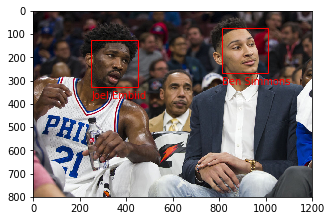

In [150]:
# Detect Celebrities

image = 'embiidandsimmons.png'.replace('+',' ').replace('-',' ')

s3bucket.download_file(image, temp_image)
pil_im = Image.open(temp_image, 'r')
pw = pil_im.size[0]
ph = pil_im.size[1]

fig, ax = plt.subplots(1, 1,figsize=(5, 5))


# Request body
response=client.recognize_celebrities(
    Image={
        'S3Object': {
            'Bucket': 'rekognitionbotoartifact',
            'Name': image
            #,'Version': '1'
        }
    }
)


for x in response['CelebrityFaces']:
    print ('Name:\t%s' % x['Name'])
    print ('Match:\t%s\n' % x['MatchConfidence'])
    face = x['Face']['BoundingBox']
    rect = patches.Rectangle((pw * face['Left'],
                          ph * face['Top']),
                         pw * face['Width'],
                         ph * face['Height'],
                         linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    ax.text(pw * face['Left'], ph * face['Top'] + ph * face['Height'] + 50, x['Name'], color='red')
    ax.imshow(np.asarray(pil_im), aspect='equal', extent=None)

ax.imshow(np.asarray(pil_im))

- Confidence: 98.91958618164062
  Name: Animal
- Confidence: 98.91958618164062
  Name: Beagle
- Confidence: 98.91958618164062
  Name: Canine
- Confidence: 98.91958618164062
  Name: Dog
- Confidence: 98.91958618164062
  Name: Hound
- Confidence: 98.91958618164062
  Name: Mammal
- Confidence: 98.91958618164062
  Name: Pet
- Confidence: 92.30182647705078
  Name: Bird
- Confidence: 92.30182647705078
  Name: Magpie
- Confidence: 60.45064163208008
  Name: Penguin
- Confidence: 59.4466438293457
  Name: King Penguin
- Confidence: 52.37382125854492
  Name: Albatross
- Confidence: 52.37382125854492
  Name: Seagull



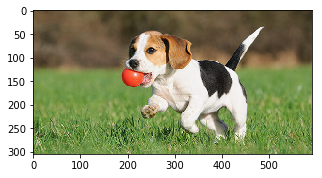

In [157]:
# Detect Labels

image = 'dog_pic.png'.replace('+',' ').replace('-',' ')

s3bucket.download_file(image, temp_image)
pil_im = Image.open(temp_image, 'r')
pw = pil_im.size[0]
ph = pil_im.size[1]

fig, ax = plt.subplots(1, 1,figsize=(5, 5))


# Request body
response=client.detect_labels(
    Image={
        'S3Object': {
            'Bucket': 'rekognitionbotoartifact',
            'Name': image
            #,'Version': '1'
        }
    }
)

print (yaml.dump(response['Labels'], allow_unicode=True, default_flow_style=False))

ax.imshow(np.asarray(pil_im))

ModerationLabels:
- Confidence: 56.005741119384766
  Name: Suggestive
  ParentName: ''
- Confidence: 56.005741119384766
  Name: Female Swimwear Or Underwear
  ParentName: Suggestive
ResponseMetadata:
  HTTPHeaders:
    connection: keep-alive
    content-length: '190'
    content-type: application/x-amz-json-1.1
    date: Mon, 24 Jul 2017 14:59:43 GMT
    x-amzn-requestid: b9be7141-7080-11e7-b39d-295ba5721458
  HTTPStatusCode: 200
  RequestId: b9be7141-7080-11e7-b39d-295ba5721458
  RetryAttempts: 0



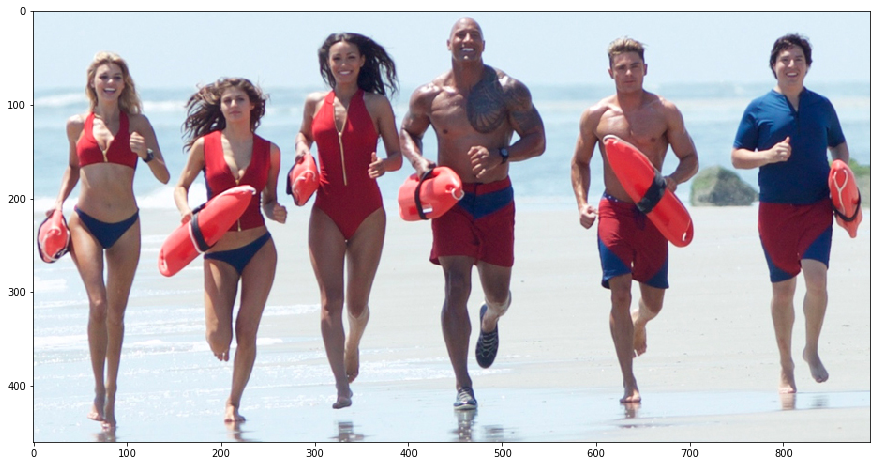

In [168]:
# Moderate Labels

from io import BytesIO
# Need to have this file locally, if not, download or load one directly from the URL
image = 'baywatchcastrunning.jpg'

pil_b = open(image, "rb").read()
pil_im = Image.open(BytesIO(pil_b))
pw = pil_im.size[0]
ph = pil_im.size[1]

fig, ax = plt.subplots(1, 1,figsize=(15, 15))


# Request body
response=client.detect_moderation_labels(
    Image={
        'Bytes': pil_b
    }
)

print (yaml.dump(response, allow_unicode=True, default_flow_style=False))

ax.imshow(np.asarray(pil_im), aspect='equal', extent=None)

  